In [1]:
from PIL import Image
from PIL import ImageDraw
import os

In [2]:
def join_images_vertically(*image_paths, save_path=None):
    """Join multiple images vertically into a single image.
    
    Args:
        *image_paths: Variable number of paths to image files
        save_path: Optional path to save the joined image
        
    Returns:
        PIL.Image: Combined image with input images stacked vertically
    """
    
    # Open all images
    images = [Image.open(path) for path in image_paths]
    
    # Get dimensions
    widths = [img.width for img in images]
    heights = [img.height for img in images]
    
    # Create new image with combined height
    max_width = max(widths)
    total_height = sum(heights)
    joined_image = Image.new('RGB', (max_width, total_height))
    
    # Paste images vertically
    y_offset = 0
    for img in images:
        joined_image.paste(img, (0, y_offset))
        y_offset += img.height
        
    # Save image if path provided
    if save_path:
        joined_image.save(save_path)
        
    return joined_image

In [3]:
def strip_and_join_horizontally(image_path, start_percent, end_percent, save_path=None):
    """Remove a horizontal strip from an image and join the remaining parts.
    
    Args:
        image_path: Path to the input image
        start_percent: Starting y-coordinate of strip to remove as percentage (0-100)
        end_percent: Ending y-coordinate of strip to remove as percentage (0-100)
        save_path: Optional path to save the modified image. If None, overwrites original
        
    Returns:
        PIL.Image: Modified image with strip removed and parts joined
    """
    
    # Open image
    img = Image.open(image_path)
    
    # Get dimensions
    width = img.width
    height = img.height
    
    # Convert percentages to pixel coordinates
    start_height = int(height * start_percent / 100)
    end_height = int(height * end_percent / 100)
    
    # Create new image
    new_height = height - (end_height - start_height)
    new_image = Image.new('RGB', (width, new_height))
    
    # Copy top part
    top_part = img.crop((0, 0, width, start_height))
    new_image.paste(top_part, (0, 0))
    
    # Copy bottom part
    bottom_part = img.crop((0, end_height, width, height))
    new_image.paste(bottom_part, (0, start_height))
    
    # Save image
    save_path = save_path or image_path
    new_image.save(save_path)
    
    return new_image


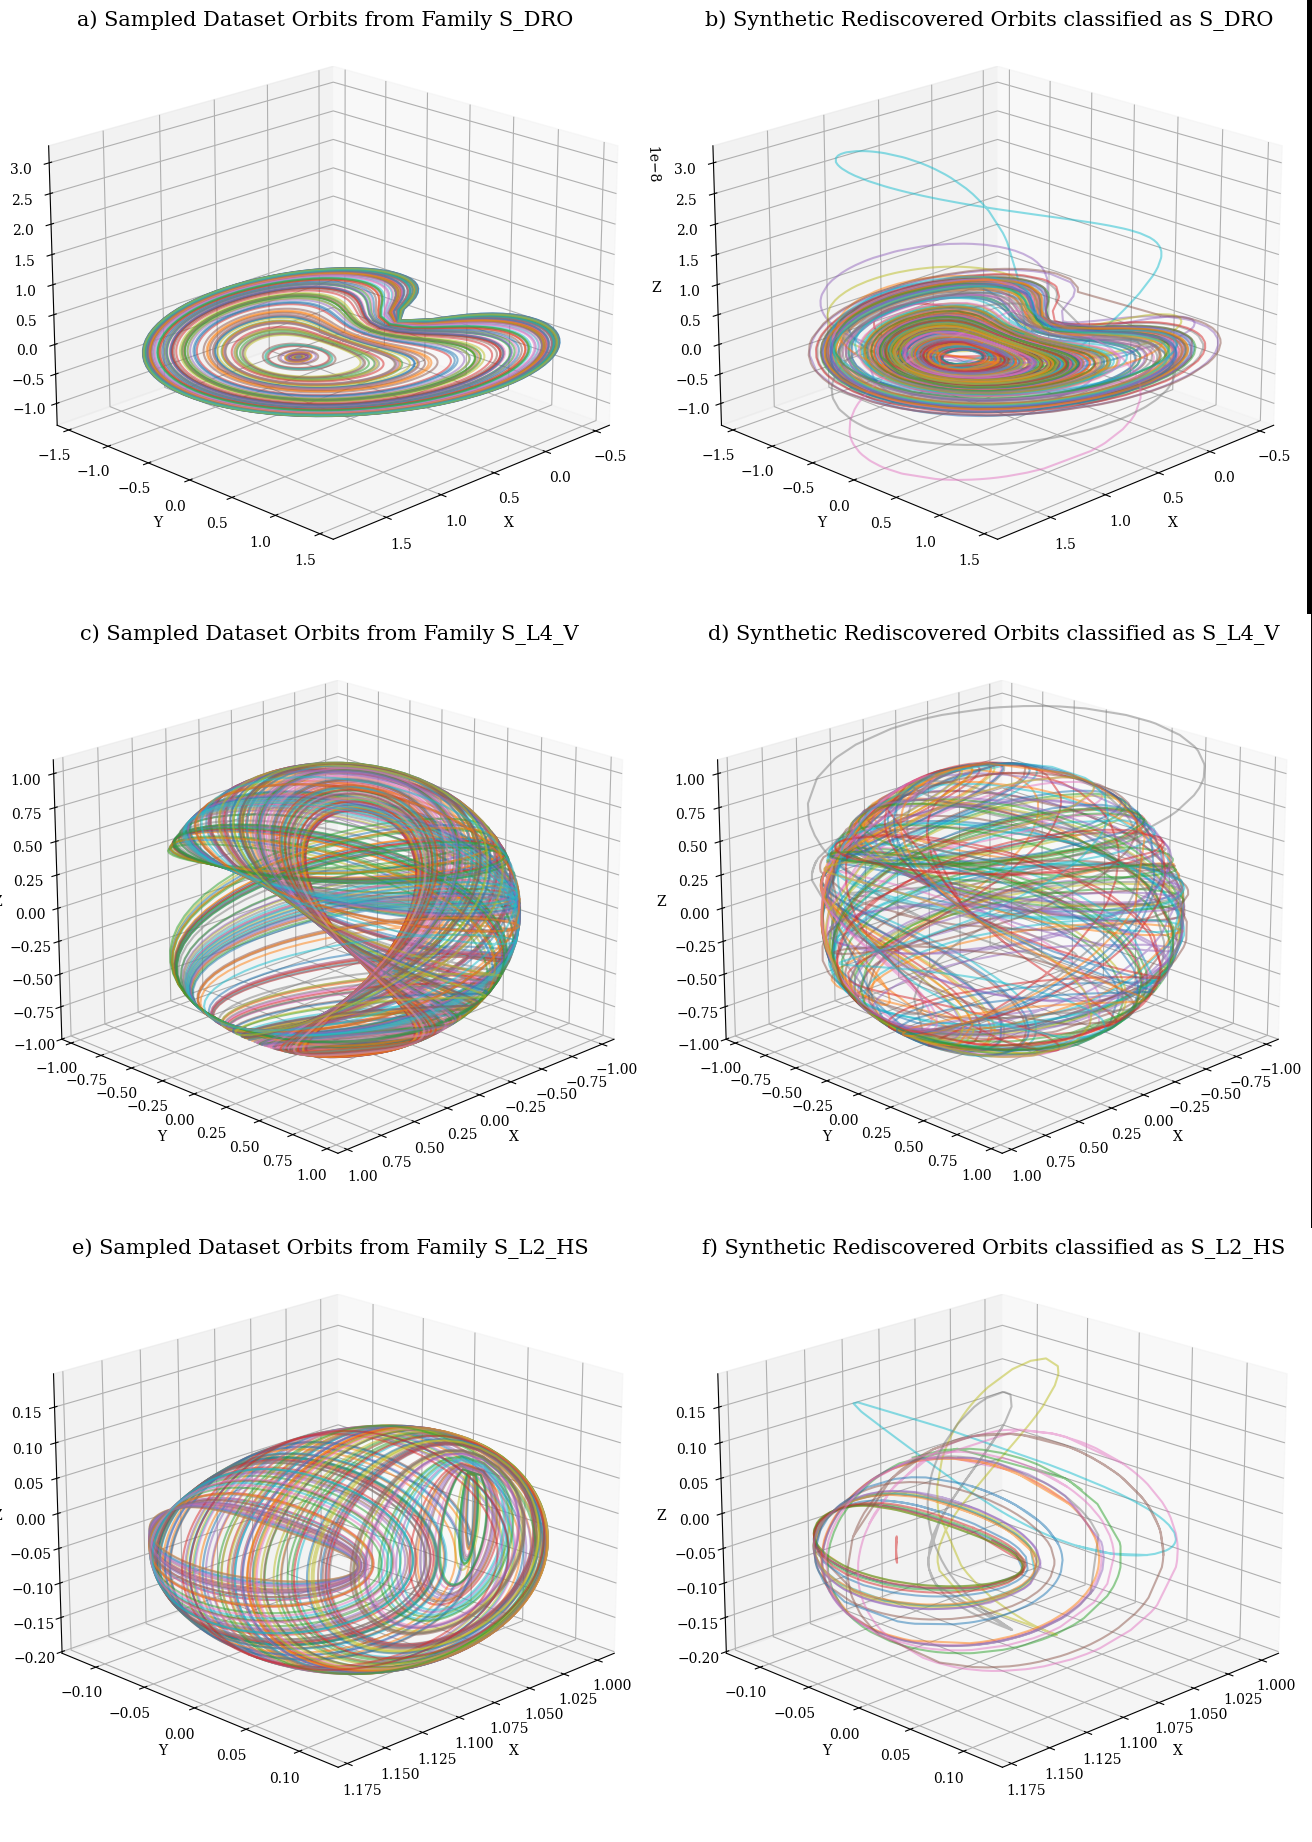

In [8]:
# Example image paths
image_1 = '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/rediscovered_families/sdro_discovered.png'
image_2 = '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/rediscovered_families/sl4v_discovered.png'
image_3 = '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/rediscovered_families/sl2hs_discovered.png'

# Call function and save joined image
save_path = '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/joined_discovered.png'
# strip_and_join_horizontally(image_1, 10, 17)
# strip_and_join_horizontally(image_2, 10, 17)
# strip_and_join_horizontally(image_3, 10, 17)
join_images_vertically(image_1, image_2, image_3, save_path=save_path)


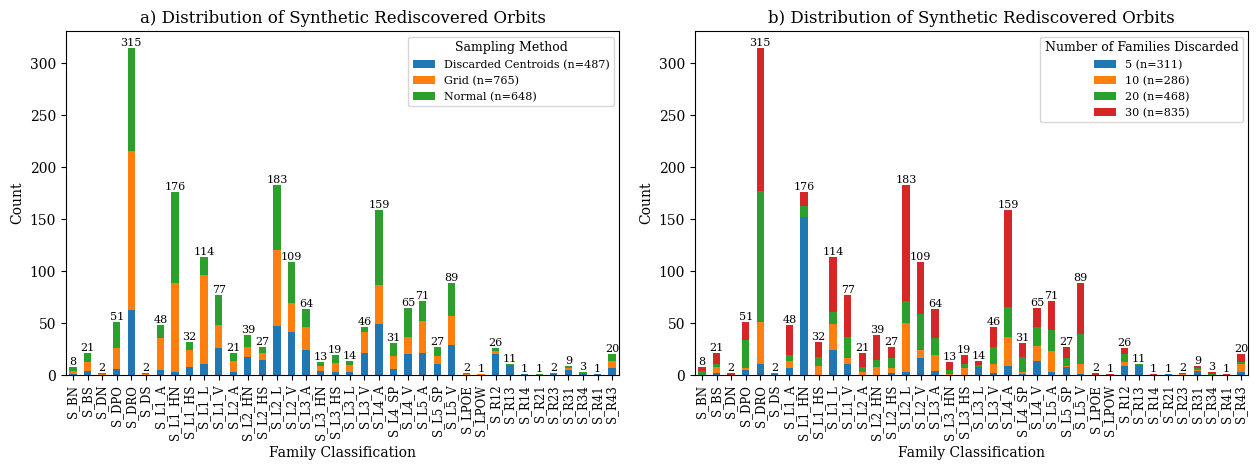

In [9]:
def join_images_horizontally(image_paths, save_path):
    images = [Image.open(img_path) for img_path in image_paths]
    
    # Calculate total width and max height
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)
    
    # Create new image with the total width and max height
    new_image = Image.new('RGB', (total_width, max_height))
    
    # Paste images into the new image
    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width
    
    # Save the new image
    new_image.save(save_path)
    return new_image

# Example image paths
image_paths = [
    r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/distribution_rediscovered_sampling.png',
    r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/distribution_rediscovered_discarded_fams.png'
]

# Call the function to join images horizontally
save_path = r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/joined_distributions.png'
join_images_horizontally(image_paths, save_path)

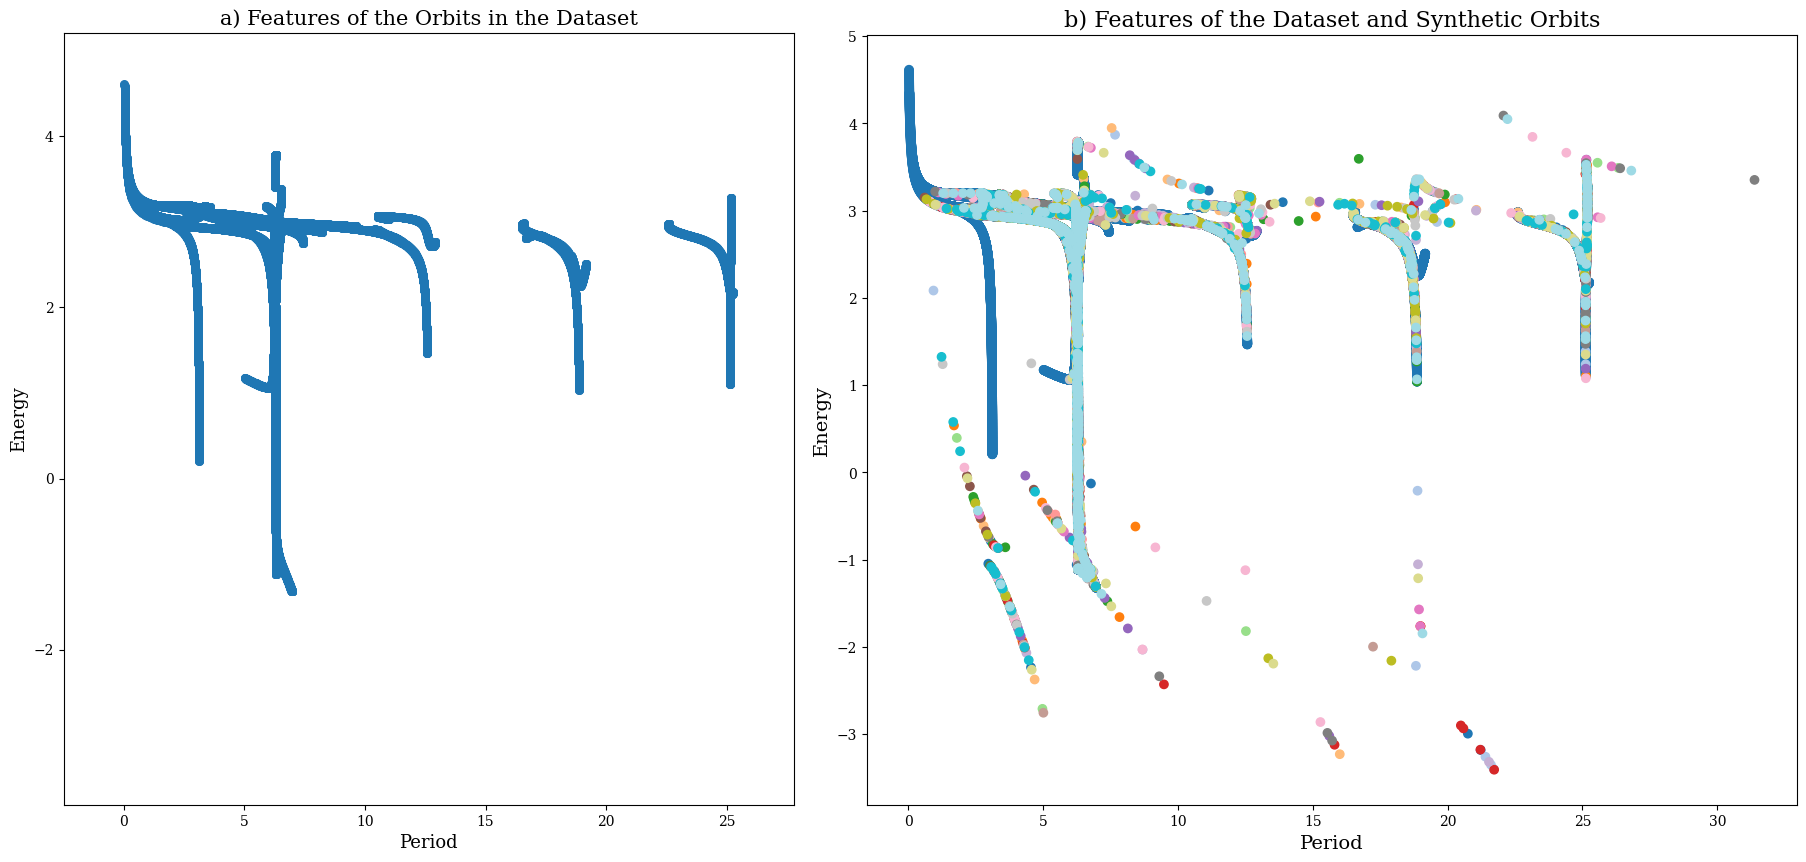

In [10]:
# Example image paths
image_paths = [
    r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/dataset_features.png',
    r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/synthetic_dataset_features.png'
]

# Call the function to join images horizontally
save_path = r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/joined_features.png'
join_images_horizontally(image_paths, save_path) #test

In [48]:
from PIL import Image, ImageDraw, ImageFont
import os

def join_images_in_grid(image_paths, save_path, print_labels=False, font_size=40):
    # Load images
    images = [Image.open(img_path) for img_path in image_paths]
    
    # Define grid size
    grid_size = 2  # Change grid size to 2x2
    num_images = len(images)
    
    # Calculate the size of the new image
    max_width = max(img.width for img in images)
    max_height = max(img.height for img in images)
    total_width = max_width * grid_size
    total_height = max_height * ((num_images + grid_size - 1) // grid_size)  # Round up for rows
    
    # Create new image with the calculated size and white background
    new_image = Image.new('RGB', (total_width, total_height), 'white')
    
    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()  # Fallback to default font if the specified font is not available
    
    # Paste images into the new image
    x_offset = 0
    y_offset = 0
    spacing = -8  # Define spacing between images
    for index, img in enumerate(images):
        new_image.paste(img, (x_offset, y_offset))
        
        # Optionally print labels
        if print_labels:
            label = f"{chr(97 + index)})"  # a), b), c), ...
            draw = ImageDraw.Draw(new_image)
            draw.text((x_offset + 15, y_offset + 15), label, font=font, fill="black")  # Use the specified font
        
        x_offset += max_width + spacing  # Add spacing between images
        if (index + 1) % grid_size == 0:  # Move to the next row
            x_offset = 0
            y_offset += max_height + spacing  # Add spacing between rows
    
    # Save the new image
    new_image.save(save_path)
    return new_image

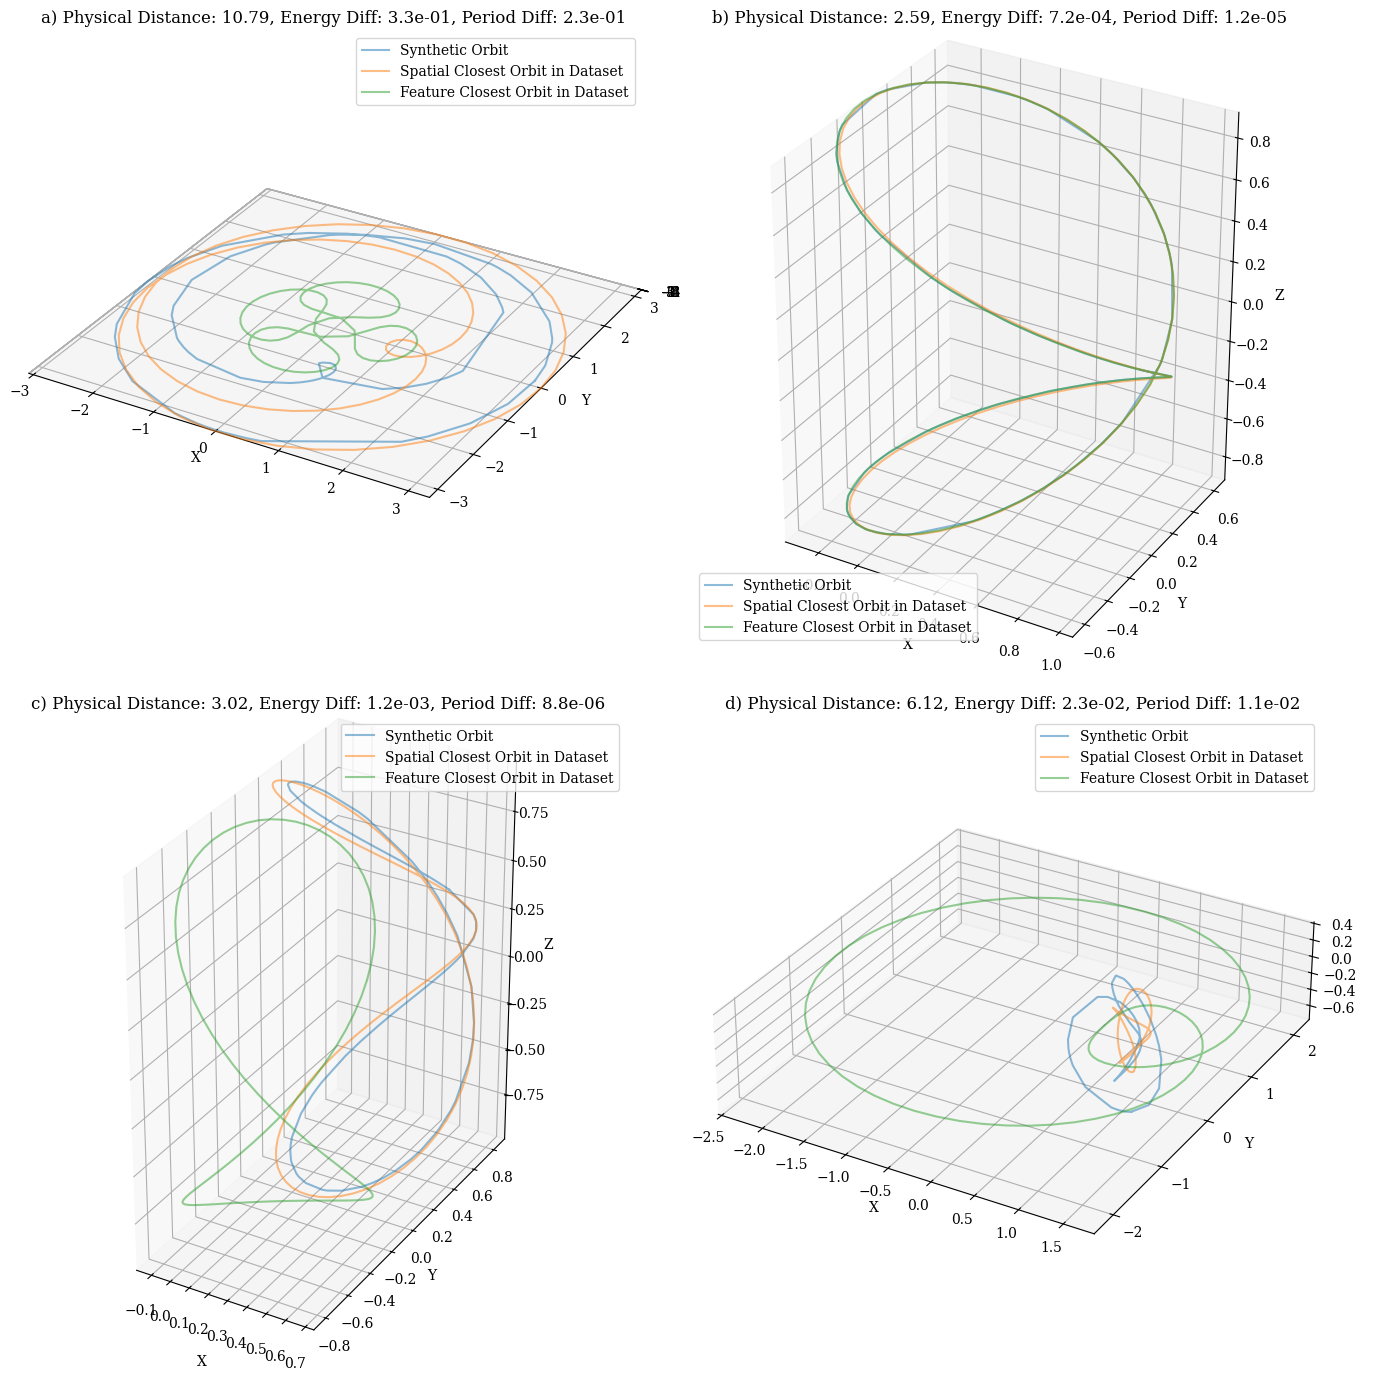

In [49]:
save_path = r'/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/joined_orbits_with_closers.png'

image_paths= ['/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/specific_orbits/orbit_spat_feat_1.png',
 '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/specific_orbits/orbit_spat_feat_2.png',
 '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/specific_orbits/orbit_spat_feat_3.png',
 '/orbit-generation/nbs_experiments/01_generative_discovery_em/figures/specific_orbits/orbit_spat_feat_4.png']

join_images_in_grid(image_paths, save_path, print_labels=False)
